# 1. load drive and install and load dependencies

In [1]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pycaret

     |████████████████████████████████| 266 kB 11.9 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 2.0 MB 84.8 MB/s 
     |████████████████████████████████| 16.9 MB 83 kB/s 
     |████████████████████████████████| 1.3 MB 87.9 MB/s 
     |████████████████████████████████| 1.7 MB 85.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 65.2 MB/s 
     |████████████████████████████████| 6.8 MB 23.8 MB/s 
     |████████████████████████████████| 271 kB 59.6 MB/s 
     |████████████████████████████████| 261 kB 83.9 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 113 kB 88.5 MB/s 
     |████████████████████████████████| 3.1 MB 64.6 MB/s 
     |████████████████████████████████| 62 kB 733 kB/s 
     |████████████████████

In [3]:
#pip install -U imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

# 2. import data

In [4]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_10.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_10.zip
  inflating: subset_10.csv           


In [5]:
df = pd.read_csv('subset_10.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4143684_CACCTTGTCGATCCCT,-0.071988,-0.265577,-0.087526,-0.095535,-0.133205,-0.335218,-0.244682,-0.255132,-0.239429,-0.296508,-0.095936,1.419227,-0.079582,-0.202538,2.275878,-0.944980,-0.332115,-0.295795,-0.322602,-0.078251,-0.251609,-0.450389,-0.280038,-0.208247,1.254934,-0.340695,-0.424307,-0.365255,-0.511625,-0.164532,-0.317861,-0.174058,-0.192115,-0.410630,-0.105355,-0.285387,1.800882,-0.212355,-0.333085,-0.568453,...,-0.445091,-0.232213,0.839193,-0.148710,-0.157561,-0.665817,1.627726,2.929252,3.752024,-0.053761,-0.602856,2.797265,-0.548498,-0.963906,-0.304226,-0.226689,-0.224802,-0.181524,-0.120809,0.616167,0.633112,-0.171473,-0.238591,-0.183494,-0.336997,-0.171524,-0.333410,0.066321,-0.284784,-1.236136,-1.140978,0.225116,0.285313,0.404852,-0.403512,-1.331429,macrophage,macrophage,macrophage,macrophage
ERS3566166_GTCACGGTCCGGCACA,-0.106635,-0.604680,-0.504235,-0.442228,-0.103701,-0.425101,-0.339960,-0.249205,-0.412101,-0.330718,-0.121260,-0.473610,-0.221898,-0.445567,-0.315318,-1.090314,-0.404402,-0.356656,-0.258395,-0.119093,4.775130,-0.317039,-0.157664,-0.124176,-0.728042,-0.282863,-0.221680,-0.444395,-0.327189,-0.221121,-0.357812,-0.177315,-0.184892,-0.390698,-0.146081,-0.286798,-0.412339,-0.318400,-0.371817,-0.964195,...,-0.309796,-0.272343,-1.405040,-0.187214,-0.236375,-0.031855,-0.739427,-0.392869,-0.328025,-0.149975,-0.545499,-0.278868,-0.161776,0.793728,-0.338451,-0.423338,3.398397,3.837188,-0.225741,1.171086,-0.853118,-0.181345,-0.174656,-0.144594,-0.321012,-0.257268,-0.392649,-1.322311,1.234960,0.850628,0.381848,0.458554,1.284652,0.757548,-2.598698,-0.015576,CD8 effector memory T-cell,T-cell,CD8 T-cell,CD8 effector memory T-cell
GSM4143655_CCGGGATTCTACCAGA-2,-0.124044,-0.755008,-0.596920,-0.571494,-0.094010,-0.426885,-0.357217,-0.231042,-0.432728,-0.316848,-0.134548,-0.488330,-0.178900,-0.514463,-0.295380,0.896807,-0.425794,-0.362639,-0.285961,-0.118961,-0.312215,-0.351266,-0.141408,-0.105225,-0.794916,-0.267249,-0.193238,-0.425187,-0.333225,-0.233320,-0.345479,-0.191265,-0.188457,-0.380927,-0.139163,-0.287852,-0.415528,-0.341753,-0.339481,1.249052,...,-0.307268,-0.312375,1.051417,-0.185299,-0.238428,-0.033041,-0.833691,-0.439555,-0.343546,-0.127695,2.437956,-0.261175,4.382756,-1.277835,-0.399502,-0.510792,-0.436643,-0.422582,-0.244247,-0.873464,1.180602,-0.169597,-0.158458,-0.141976,-0.308257,-0.220758,3.579736,-3.214363,-0.142946,0.945928,1.772948,0.503938,-0.872040,-0.466063,0.887722,0.065105,CD8 T-cell (unspecified),T-cell,CD8 T-cell,CD8 T-cell (unspecified)
GSM4143657_CGAATGTAGAGCCTAG,-0.096913,1.311413,-0.358989,0.802298,-0.117326,-0.379667,-0.290580,-0.236730,-0.322928,-0.302283,-0.101962,-0.481266,-0.205666,-0.353486,-0.330180,-1.126939,1.778547,2.101355,-0.348070,-0.093501,-0.266935,1.792534,-0.222964,-0.166076,-0.689498,-0.297045,-0.316700,-0.396968,-0.494939,-0.210438,-0.345373,-0.176377,-0.194003,-0.405211,-0.121287,-0.306903,1.686422,-0.281933,-0.358402,-0.305790,...,-0.411966,-0.285689,-0.095814,-0.160479,-0.196167,-0.492336,-0.631893,-0.305707,-0.394605,-0.122268,-0.572069,-0.266259,-0.411910,-0.005568,1.804333,-0.376868,1.785804,-0.293121,-0.193485,0.049589,1.546430,4.524909,-0.201492,-0.171496,2.289642,3.335222,-0.350693,-0.632696,-0.555727,-0.385962,-0.161600,0.990495,-1.363653,0.636151,0.552661,0.082520,CD8 resident memory T-cell,T-cell,CD8 T-cell,CD8 resident memory T-cell
GSM4143657_

In [10]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell,5747,0.756483
B-cell,533,0.070159
macrophage,459,0.060419
plasma cell,226,0.029749
killer cell,186,0.024483
monocyte,141,0.018560
dendritic cell,120,0.015796
granulocyte,64,0.008424
lymphocyte,62,0.008161
mast cell,42,0.005528


In [6]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2', 'cell_type_3'])
y = df['cell_type']

# 3. Import Model

In [7]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_12classes_unbalanced.sav'
lr = joblib.load(filename)

# 4. get feature importance

In [18]:
importance = lr.coef_

In [ ]:
list(importance[0])

## Importances according to classes

In [16]:
keys = lr.classes_
keys

array(['B-cell', 'T-cell', 'dendritic cell', 'granulocyte', 'killer cell',
       'leukocyte', 'lymphocyte', 'macrophage', 'mast cell', 'monocyte',
       'myeloid cell', 'plasma cell'], dtype=object)

In [ ]:
result = {}
for i in range(0,len(keys)):
  result[keys[i]] = list(importance[i])

# 5. Plot per class

In [27]:
df_importance = pd.DataFrame({'genes': X.columns, 'importance': result['B-cell']})
df_importance.head()

,genes,importance
0,PLEKHN1,-0.010188
1,ISG15,-0.003664
2,TNFRSF18,-0.001738
3,TNFRSF4,-0.014240
4,DVL1,-0.006764


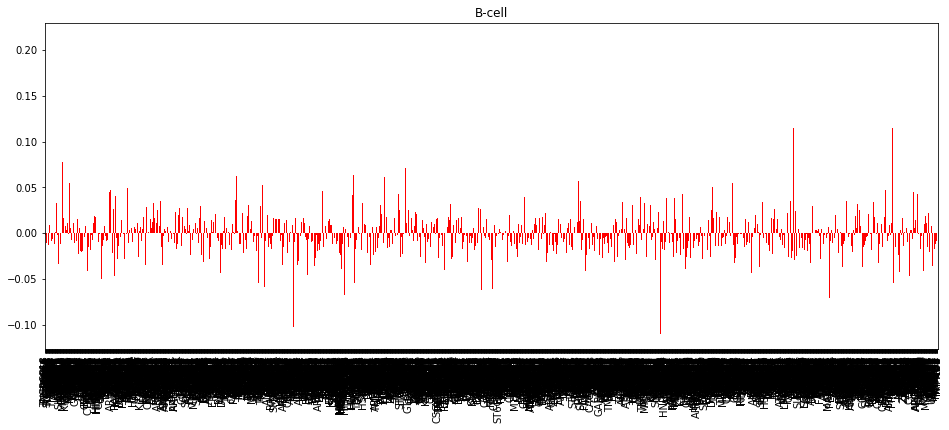

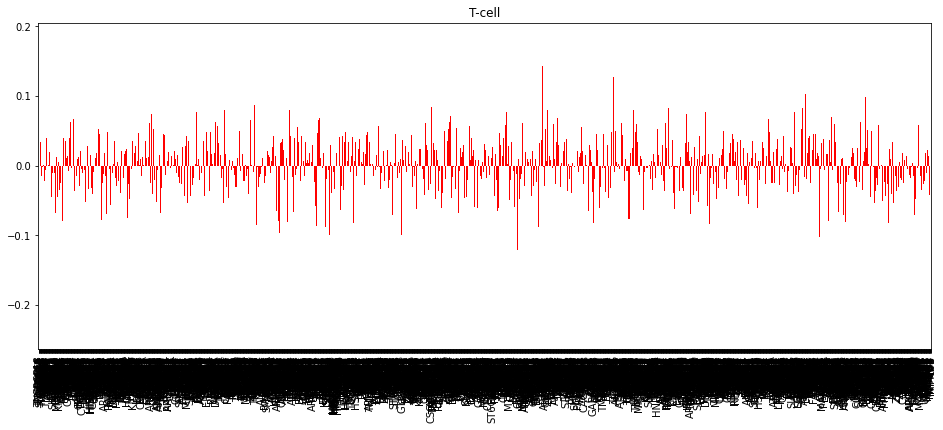

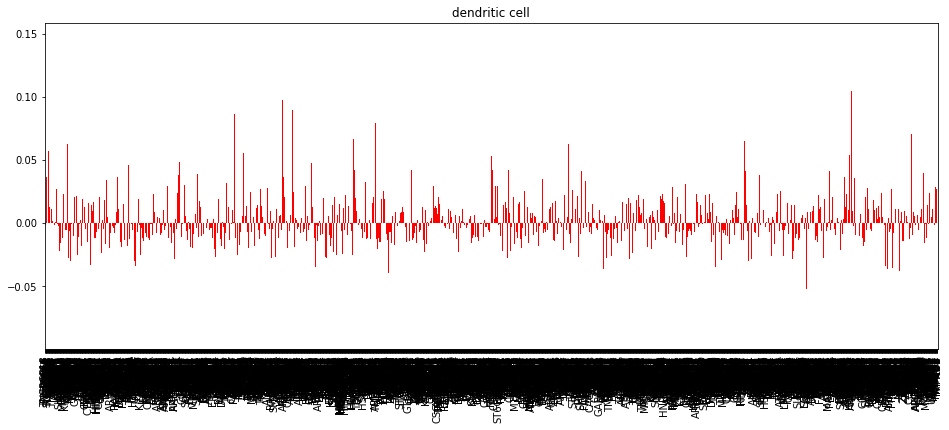

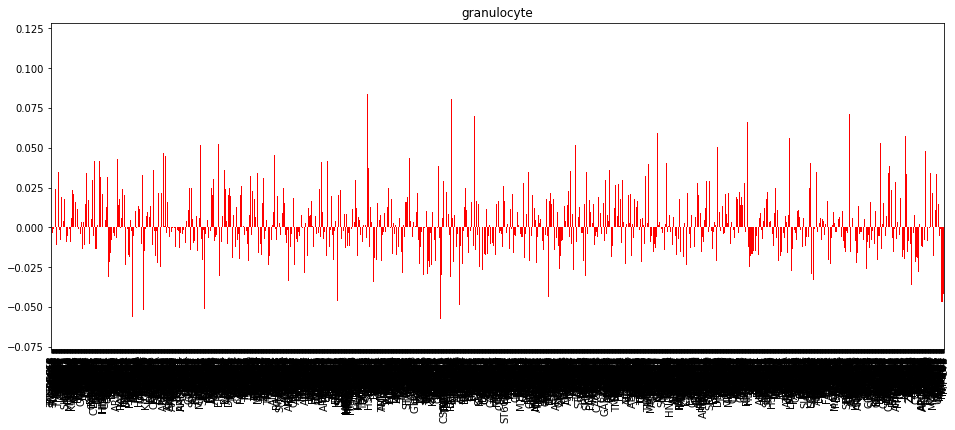

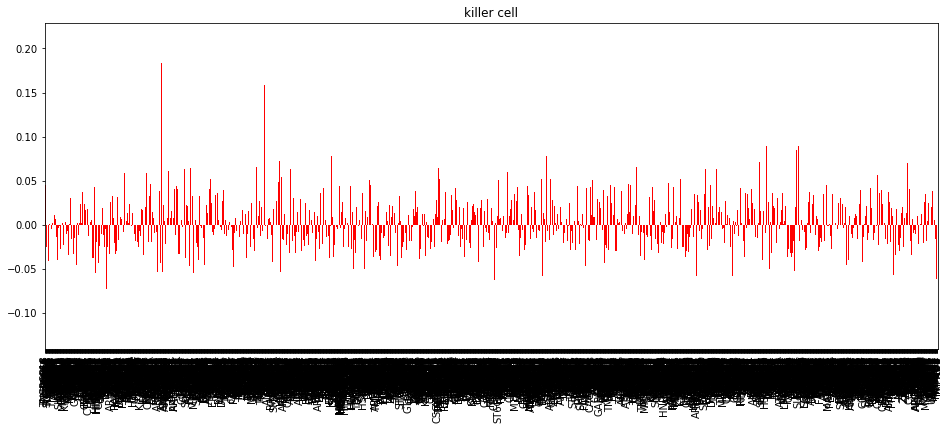

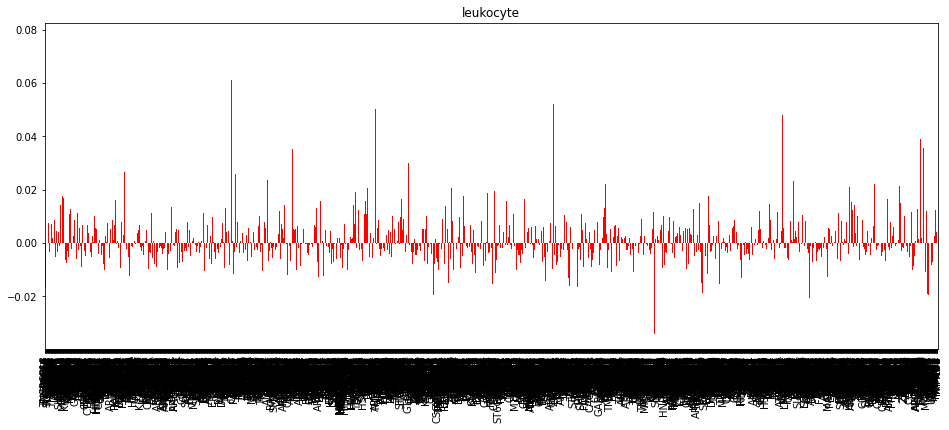

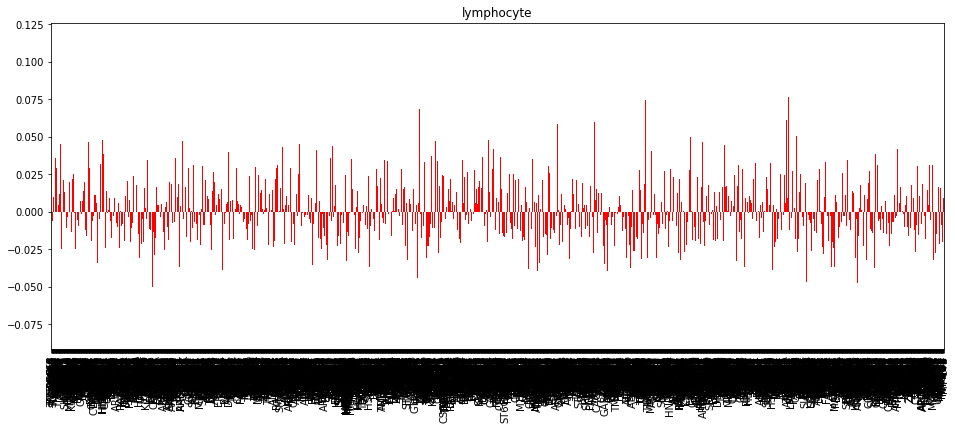

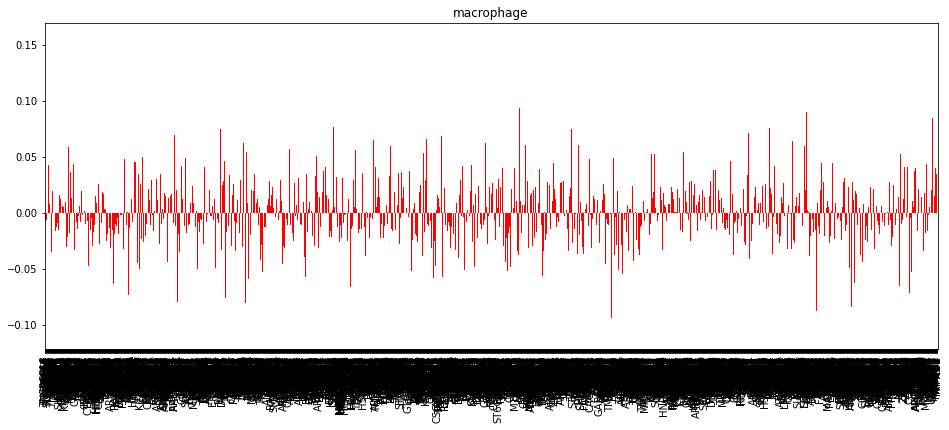

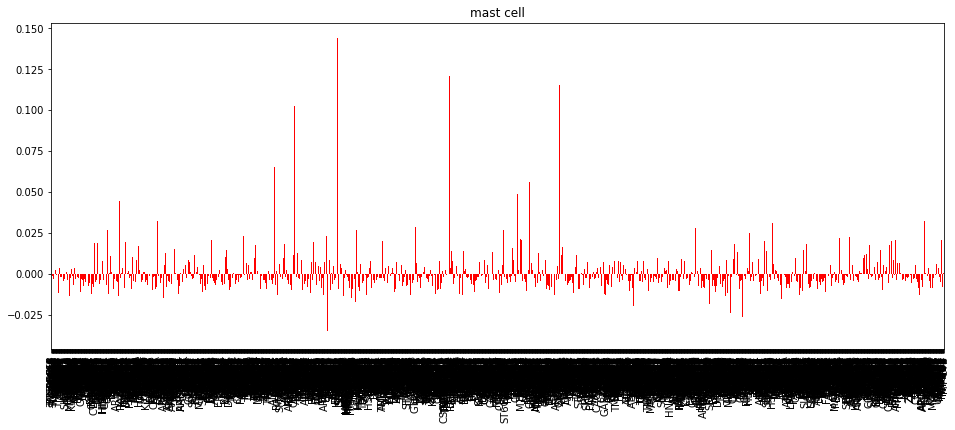

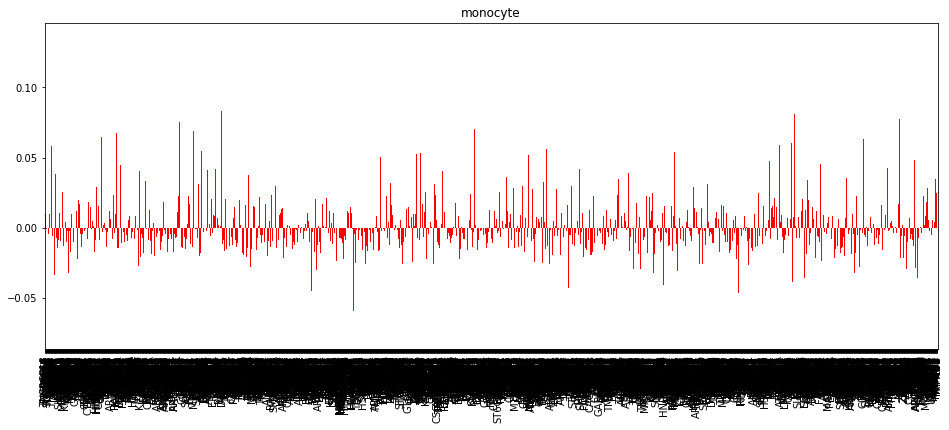

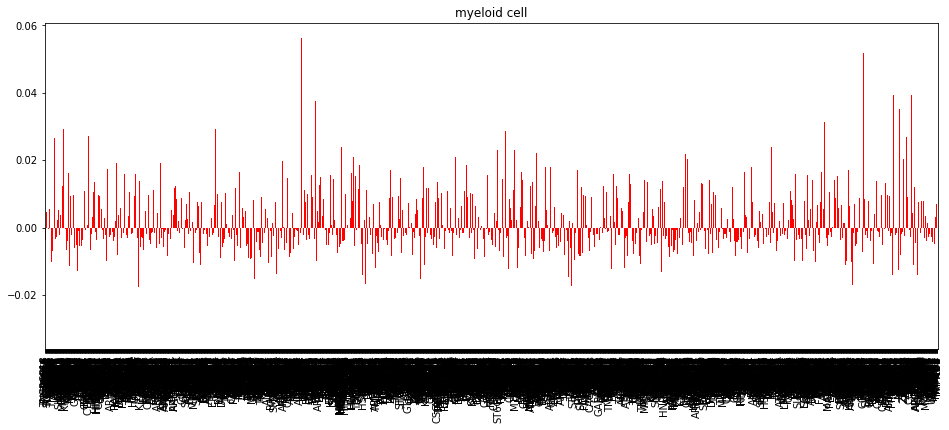

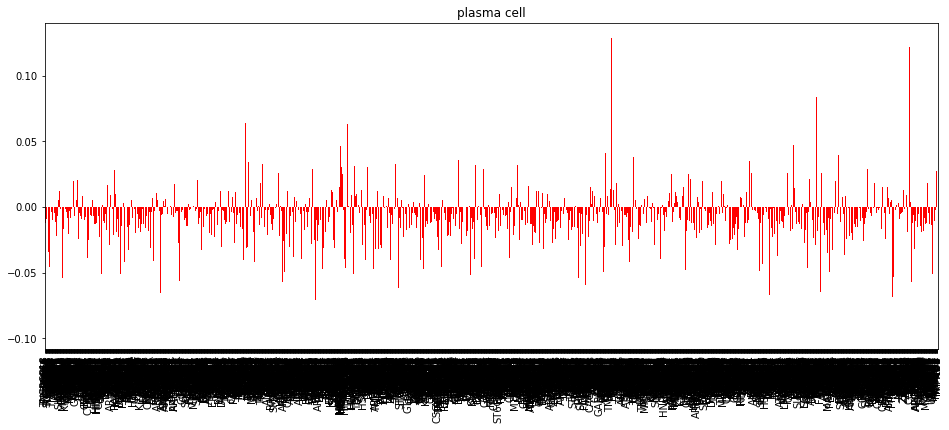

In [30]:
# Plot the feature importances of the forest

# for i in result.keys():
#     plt.figure()
#     plt.rcParams['figure.figsize'] = [16, 6]
#     plt.title(i)
#     plt.bar(range(len(result[i])), result[i].values(),
#            color="r", align="center")
#     plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
#     plt.xlim([-1, len(result[i])])
#     plt.show()

for i in result.keys():
  # make dict to sort values
  df_importance = pd.DataFrame({'genes': X.columns, 'importance': result[i]})
  # df_importance['abs_importance'] = abs(df_importance['importance'])
  # df_importance = df_importance.sort_values(by=['abs_importance'], ascending=False)

  plt.figure()
  plt.rcParams['figure.figsize'] = [16, 6]
  plt.title(i)
  plt.bar(range(len(df_importance['importance'])), df_importance['importance'],
          color="r", align="center")
  plt.xticks(range(len(df_importance['genes'])), df_importance['genes'], rotation=90)
  plt.xlim([-1, len(df_importance['importance'])])
  plt.savefig('FeatureImportance_%s.png' % (i))
  plt.show()

## Sorted Plot

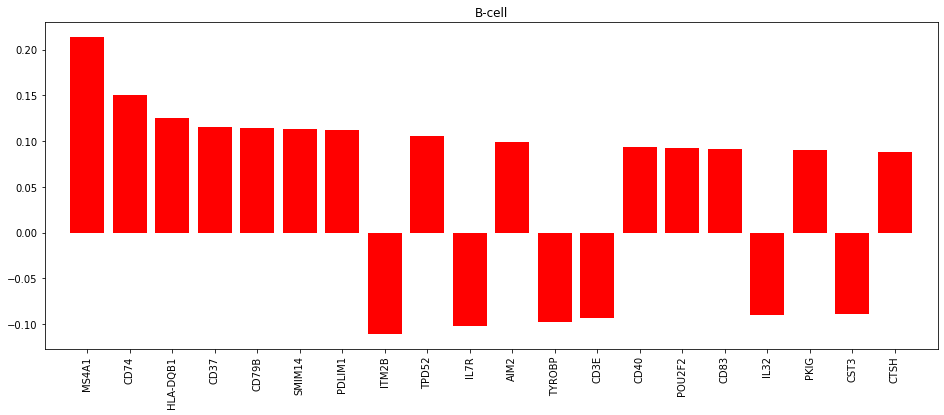

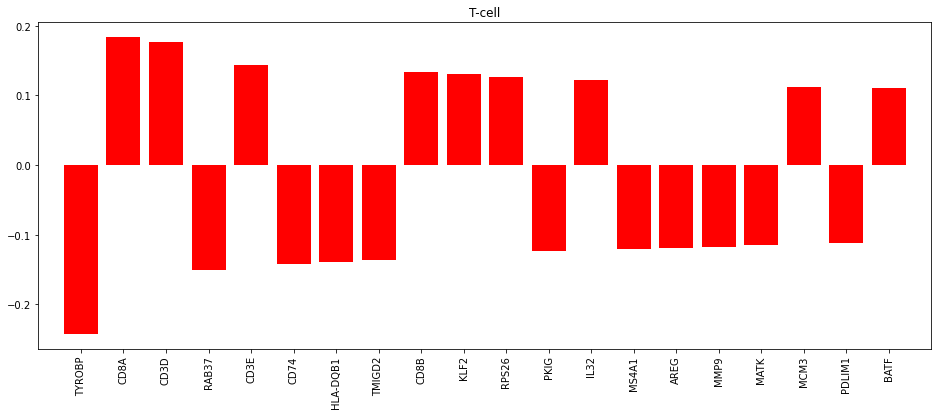

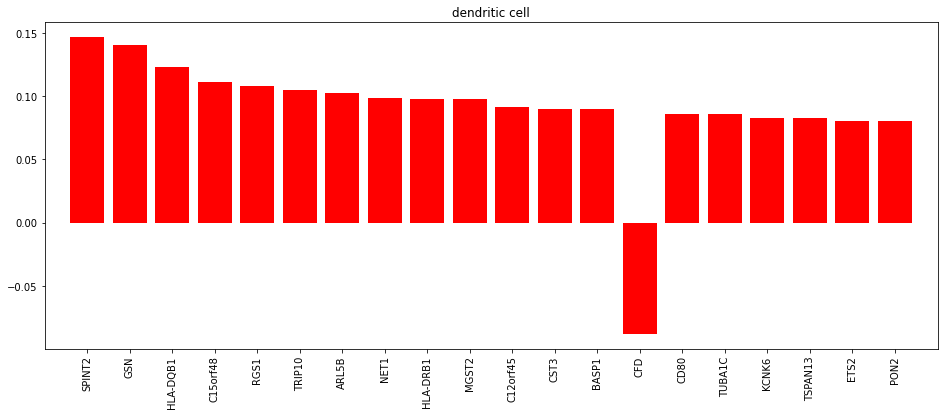

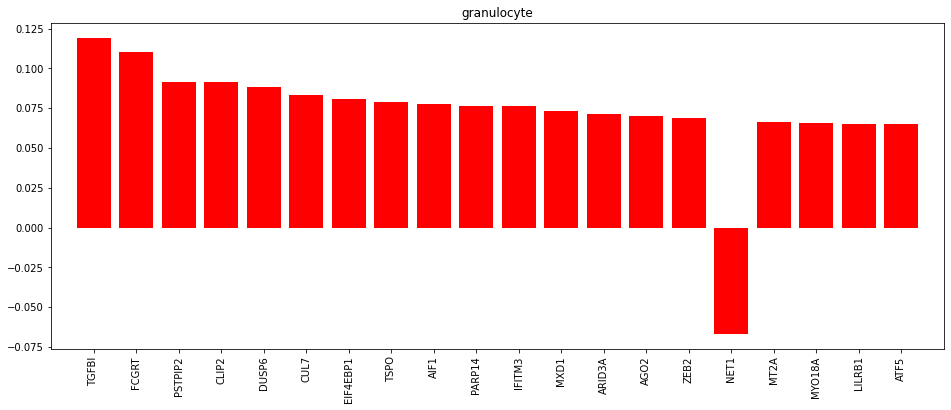

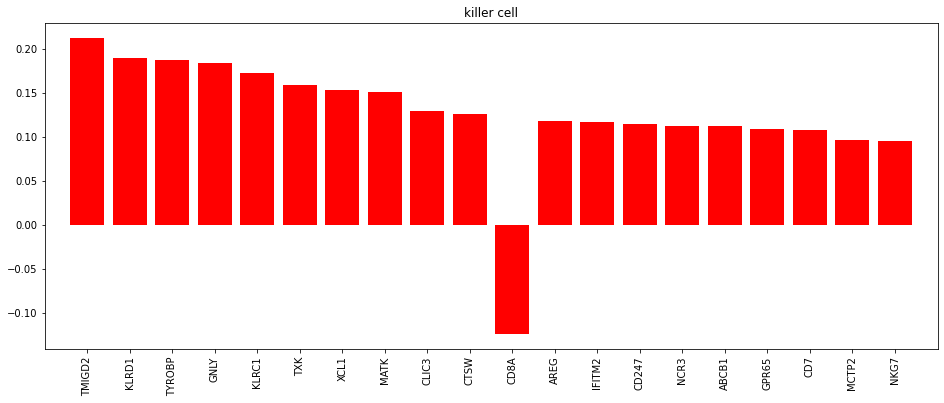

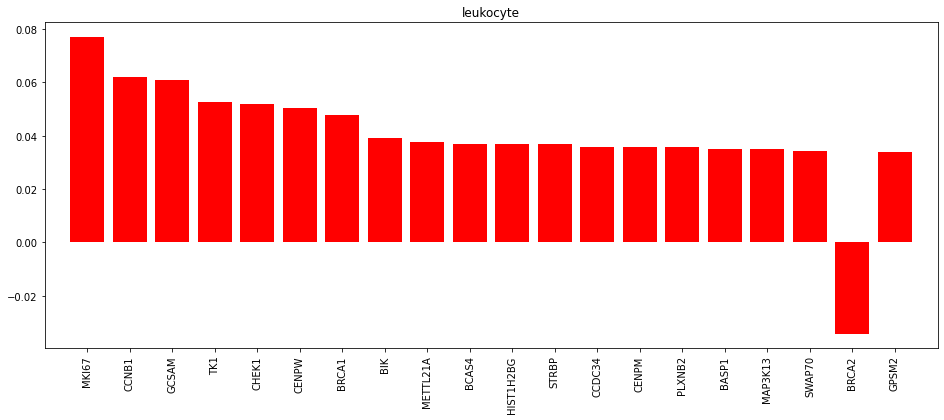

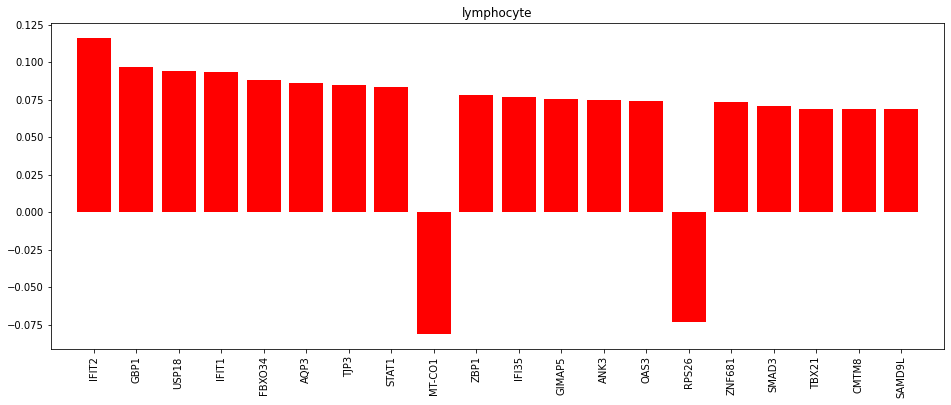

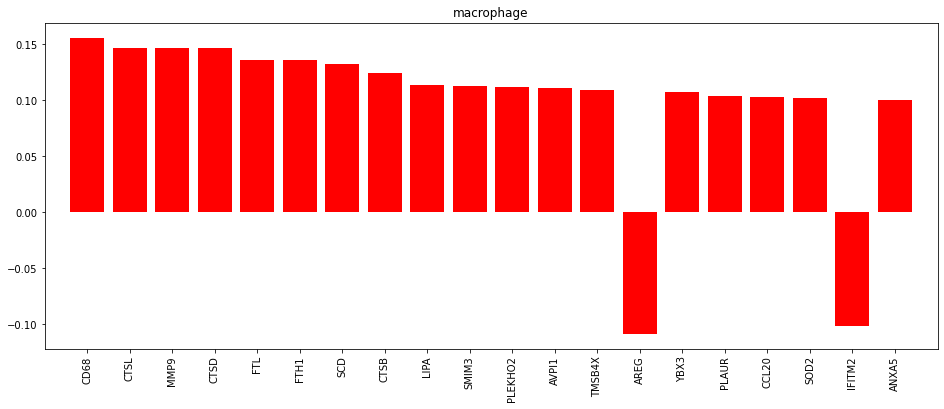

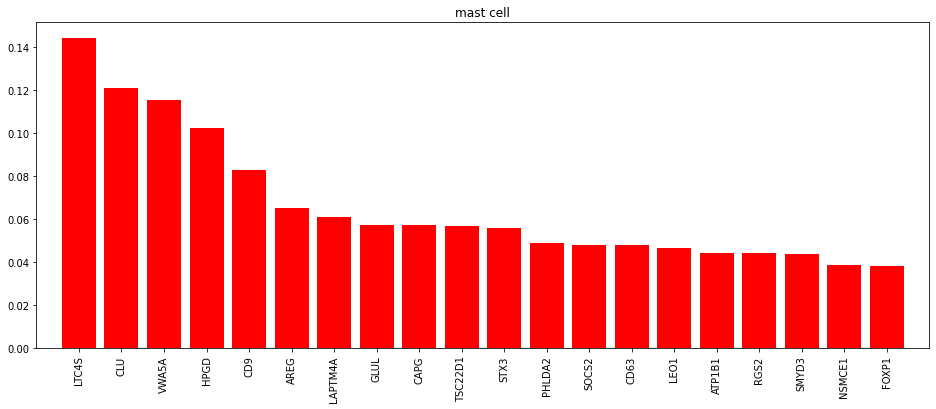

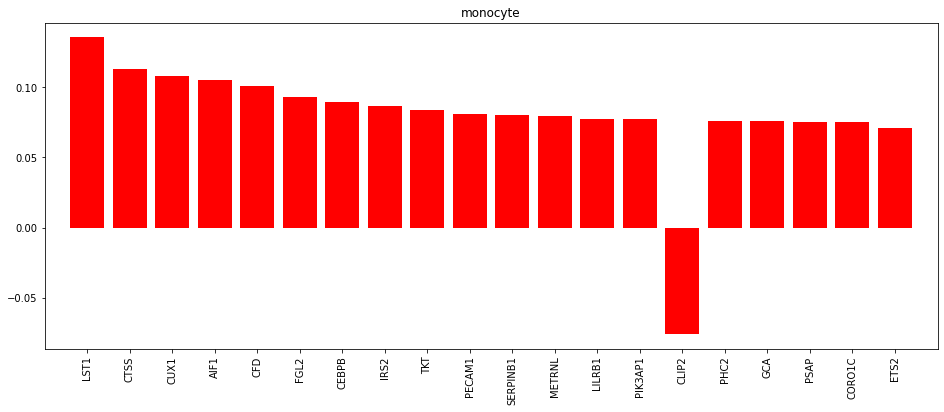

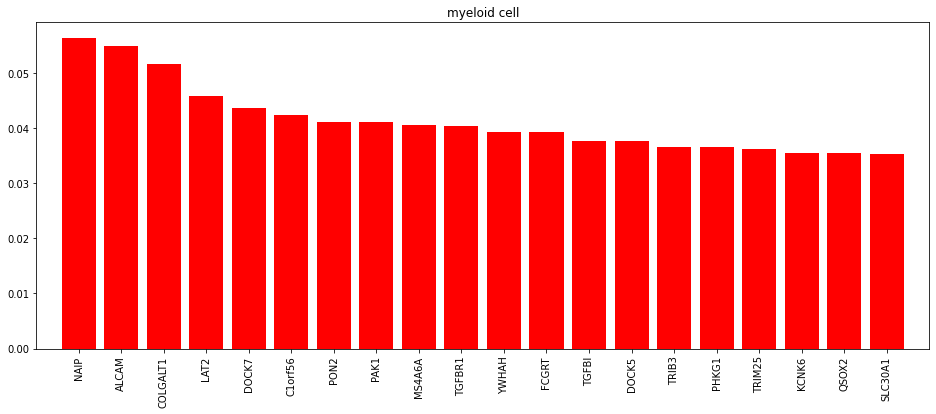

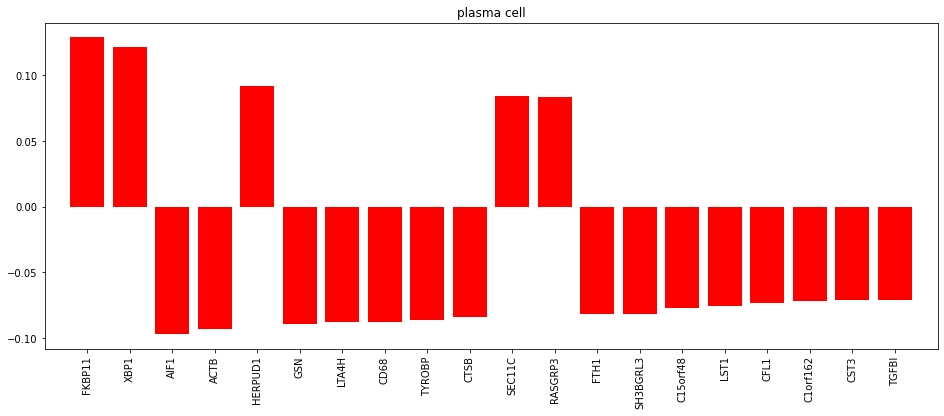

In [29]:
n = 20
for i in result.keys():
  # make dict to sort values
  df_importance = pd.DataFrame({'genes': X.columns, 'importance': result[i]})
  df_importance['abs_importance'] = abs(df_importance['importance'])
  df_importance = df_importance.sort_values(by=['abs_importance'], ascending=False)

  plt.figure()
  plt.rcParams['figure.figsize'] = [16, 6]
  plt.title(i)
  plt.bar(range(len(df_importance['importance'][:n])), df_importance['importance'][:n],
          color="r", align="center")
  plt.xticks(range(len(df_importance['genes'][:n])), df_importance['genes'][:n], rotation=90)
  plt.xlim([-1, n])
  plt.savefig('FeatureImportance_per_class_%s.png' % (i))
  plt.show()